In [3]:
import pandas as pd
from datetime import datetime

In [5]:
df= pd.read_csv('C:/pypy/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.isnull().values.any()

False

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sms

In [16]:
df.rename(columns={'#Passengers':'Passengers'}, inplace=True)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [18]:
df.Month=pd.to_datetime(df.Month)
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [20]:
df.index=df.Month # df.set_index('Month', inplace=True)

In [21]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [23]:
df=df.drop('Month',axis=1)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

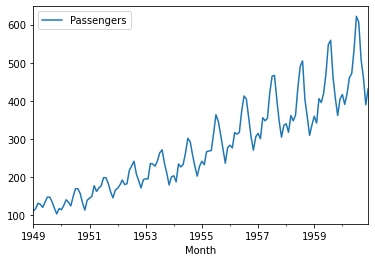

In [24]:
df.plot()

In [26]:
# seasonal and not stationary

from statsmodels.tsa.stattools import adfuller

In [27]:
def adf_stat(x):
    result=adfuller(x)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1]<= 0.05:
        print('strong evidence against null hypothesis data is stationary')
    else:
        print('Data is not stationary')
    

In [29]:
df['Passengers diff_1']=df.Passengers-df.Passengers.shift(1)
df.head()

,Passengers,Passengers diff_1
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [31]:
adf_stat(df['Passengers diff_1'].dropna())

ADF statistics: -2.8292668241699874
p-value: 0.05421329028382711
Data is not stationary


In [32]:
df['Passengers diff_2']=df['Passengers diff_1']-df['Passengers diff_1'].shift(1)
df.head()

,Passengers,Passengers diff_1,Passengers diff_2
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [33]:
adf_stat(df['Passengers diff_2'].dropna())

ADF statistics: -16.384231542468513
p-value: 2.7328918500142026e-29
strong evidence against null hypothesis data is stationary


In [34]:
# seasonal differencing
# done so that if ARIMA  does not work well, SARIMAX will work well
df['Passengers diff_12']=df['Passengers']-df['Passengers'].shift(12)

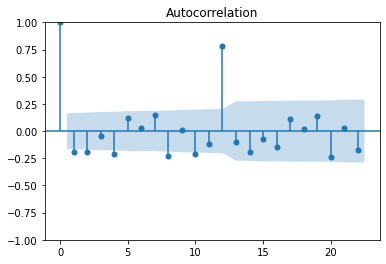

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
result=plot_acf(df['Passengers diff_2'].dropna()) #wrt ARIMA model the q here is 

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


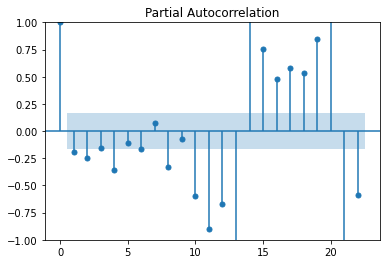

In [36]:
results=plot_pacf(df['Passengers diff_2'].dropna())

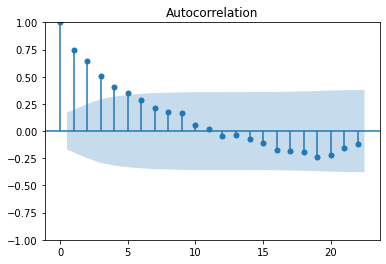

In [38]:
acf_12=plot_acf(df['Passengers diff_12'].dropna()) # wrt ARIMA model, the q=5

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


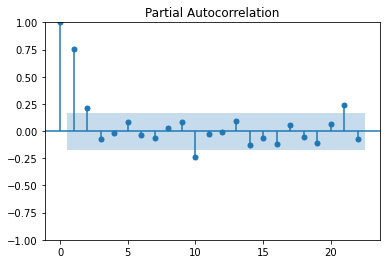

In [39]:
pacf_12=plot_pacf(df['Passengers diff_12'].dropna()) #here we first try p=2 and then p=10

In [41]:
from datetime import datetime, timedelta
#with the help of pacf we are preforming AR(autoregression), we find out p value
#with the help of acf we are preforming MA(moving average), we find out q value

In [124]:
train=df[:datetime(1955,12,1)]
test=df[datetime(1955,12,1)+timedelta(days=1):datetime(1960,12,1)]

In [125]:
# prediction
pred_start=test.index[0]
pred_end=test.index[-1]
print(pred_start)
print(pred_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [47]:
train

,Passengers,Passengers diff_1,Passengers diff_2,Passengers diff_12
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [64]:
from statsmodels.tsa.arima.model import ARIMA

In [84]:
model_arima= ARIMA(train['Passengers'],order=(10,2,0)) # order(p,d,q)

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
model_sarimax=SARIMAX(train['Passengers'],order=(2,2,5),seasonal=(2,2,5,12))

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
model_sarimax.fit().summary()

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   84
Model:               SARIMAX(3, 0, 5)   Log Likelihood                -364.565
Date:                Sat, 01 Oct 2022   AIC                            747.130
Time:                        23:02:31   BIC                            769.008
Sample:                    01-01-1949   HQIC                           755.925
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4565      0.242      1.887      0.059      -0.018       0.931
ar.L2          0.0034      0.293      0.012      0.991      -0.570       0.577
ar.L3          0.5386      0.178      3.021      0.003       0.189       0.888
ma.L1          0.7591      0.269      2.823      0.005       0.232       1.286
ma.L2          0.5122      0.487      1.052      0.293      -0.442       1.466
ma.L3         -0.2452      0.155     -1.584      0.113      -0.548       0.058
ma.L4         -0.7243      0.314     -2.304      0.021      -1.340      -0.108
ma.L5         -0.2316      0.239     -0.970      0.332      -0.699       0.236
sigma2       307.1228    150.985      2.034      0.042      11.198     603.048
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.79   Prob(JB):                         0.30
Heteroskedasticity (H):               4.07   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
pred=model_sarimax.fit().predict(start=pred_start,end=pred_end)
residuals=test['Passengers']-pred

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [123]:
test['sarimax_pred']=pred
pred.head()

C:\Users\Jane Ijeoma\AppData\Local\Temp\ipykernel_13288\2305957614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sarimax_pred']=pred


1956-01-01    291.835283
1956-02-01    291.322347
1956-03-01    304.285159
1956-04-01    293.692001
1956-05-01    298.560095
Freq: MS, Name: predicted_mean, dtype: float64

In [120]:
test.head()

,Passengers,Passengers diff_1,Passengers diff_2,Passengers diff_12,sarimax_pred,arima_pred
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,291.835283,300.183612
1956-02-01,277,-7.0,-13.0,44.0,291.322347,309.478354
1956-03-01,317,40.0,47.0,50.0,304.285159,316.443014
1956-04-01,313,-4.0,-44.0,44.0,293.692001,307.827542
1956-05-01,318,5.0,9.0,48.0,298.560095,318.544231


In [85]:
pred_arima=model_arima.fit().predict(start=pred_start,end=pred_end)

In [110]:
test['arima_pred']=pred_arima

C:\Users\Jane Ijeoma\AppData\Local\Temp\ipykernel_13288\1790035687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arima_pred']=pred_arima


In [90]:
test.head()

,Passengers,Passengers diff_1,Passengers diff_2,Passengers diff_12,sarimax_pred,arima_pred
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,276.447940,300.183612
1956-02-01,277,-7.0,-13.0,44.0,256.927090,309.478354
1956-03-01,317,40.0,47.0,50.0,243.151594,316.443014
1956-04-01,313,-4.0,-44.0,44.0,227.708127,307.827542
1956-05-01,318,5.0,9.0,48.0,255.848734,318.544231


<AxesSubplot:xlabel='Month'>

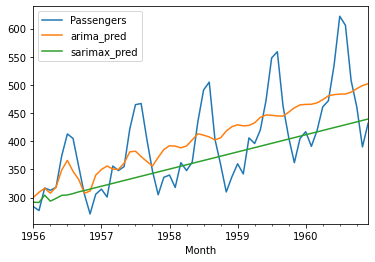

In [121]:
test[['Passengers','arima_pred','sarimax_pred']].plot()

In [97]:
model_arima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   84
Model:                ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                Sat, 01 Oct 2022   AIC                            736.477
Time:                        22:52:25   BIC                            762.951
Sample:                    01-01-1949   HQIC                           747.106
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""